Occ MAE (mHa): 3.270688020462012
Len occ: 100000
Occ R2: 1.0
Virt MAE (mHa): 23.335807786442444
Len virt: 100000
Virt R2: 1.0
4.0546975 -1.3129092
3.9331899 -1.3308321


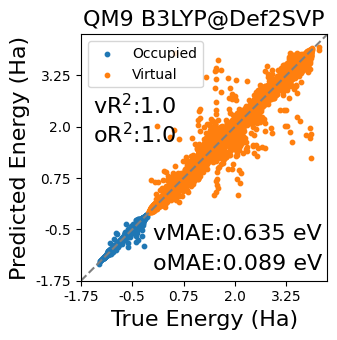

In [2]:
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
hartree_to_ev = 27.2114
title_trans = {
    "sto3g":"QM9 HF@STO-3G",
    "qh9":"QM9 B3LYP@Def2SVP",
    "tm":"TMQM HF@STO-3G",
}

class DataPlot:
    def __init__(self,prefix):
        tot_true = []
        tot_pred = []
        self.title = title_trans[prefix]
        plt.figure(figsize=(3.5,3.5))

        #Load Occupied
        head_dir = "../model_eval/ceonet_eval"
        occ_true = np.load(f"{head_dir}/test_results/{prefix}_occ_true_energies.npy")
        occ_pred = np.load(f"{head_dir}/test_results/{prefix}_occ_pred_energies.npy")
        self.occ_true = occ_true
        self.occ_pred = occ_pred
        tot_true.append(occ_true)
        tot_pred.append(occ_pred)

        #Load Virtual
        virt_true = np.load(f"{head_dir}/test_results/{prefix}_virt_true_energies.npy")
        virt_pred = np.load(f"{head_dir}/test_results/{prefix}_virt_pred_energies.npy")
        self.virt_true = virt_true
        self.virt_pred = virt_pred
        tot_true.append(virt_true)
        tot_pred.append(virt_pred)

        self.tot_true = np.hstack(tot_true)
        self.tot_pred = np.hstack(tot_pred)

    def plot(self,fs=16,djvfont = {'fontname':'DejaVu Sans'},point_size=10):
        if self.occ_true is not None:
            plt.scatter(self.occ_true,self.occ_pred,label="Occupied",s=point_size)
            occ_mae = np.round(np.abs(self.occ_pred - self.occ_true).mean()*hartree_to_ev,3)
            occ_r2 = np.round(scipy.stats.pearsonr(self.occ_true,self.occ_pred)[0]**2,2)
            plt.text(0,-1.5,f"oMAE:{occ_mae:.3f} eV",fontsize=fs,**djvfont)
            print("Occ MAE (mHa):",1000*occ_mae/hartree_to_ev)
            print("Len occ:",len(self.occ_true))
            print("Occ R2:",occ_r2)
        if self.virt_true is not None:
            plt.scatter(self.virt_true,self.virt_pred,label="Virtual",s=point_size)
            virt_mae = np.round(np.abs(self.virt_pred - self.virt_true).mean()*hartree_to_ev,3)
            virt_r2 = np.round(scipy.stats.pearsonr(self.virt_true,self.virt_pred)[0]**2,2)
            plt.text(0,-0.75,f"vMAE:{virt_mae:.3f} eV",fontsize=fs,**djvfont)
            print("Virt MAE (mHa):",1000*virt_mae/hartree_to_ev)
            print("Len virt:",len(self.virt_true))
            print("Virt R2:",virt_r2)

        print(self.tot_true.max(),self.tot_true.min())
        print(self.tot_pred.max(),self.tot_pred.min())
        tot_r2 = np.round(scipy.stats.pearsonr(self.tot_true,self.tot_pred)[0]**2,2)
        plt.text(-1.45,2.3,f"vR$^2$:{virt_r2}",fontsize=fs,**djvfont)
        plt.text(-1.45,1.6,f"oR$^2$:{occ_r2}",fontsize=fs,**djvfont)
        xmin, xmax = -1.75, 4.25
        x = y = np.arange(xmin,xmax+1)
        plt.plot(x,y,linestyle="--",color="grey")
        plt.xlim(xmin,xmax)
        plt.ylim(xmin,xmax)
        tcks = np.round(np.arange(xmin,xmax,1.25),2)
        plt.xticks(tcks,tcks)
        plt.yticks(tcks,tcks)
        plt.gca().set_aspect('equal')
        plt.legend(loc="upper left")
        plt.ylabel("Predicted Energy (Ha)",fontsize=fs,**djvfont)
        plt.xlabel("True Energy (Ha)",fontsize=fs,**djvfont)
        plt.title(self.title,fontsize=fs,**djvfont)
        plt.tight_layout()

obj = DataPlot("qh9")
obj.plot()

Occ MAE (mHa): 0.29399442880557414
Len occ: 100000
Occ R2: 1.0
Virt MAE (mHa): 0.8452339828160256
Len virt: 100000
Virt R2: 1.0
1.6680987 -1.5370108
1.6813984 -1.5341681


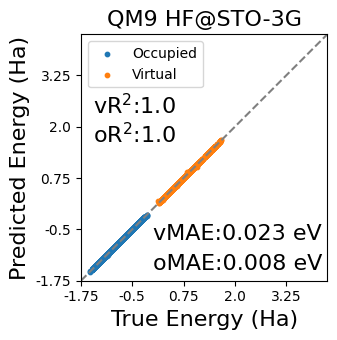

In [3]:
obj = DataPlot("sto3g")
obj.plot()
# plt.savefig("figures/sto3g_plot.png",dpi=500)

Occ MAE (mHa): 1.4332228404271738
Virt MAE (mHa): 2.2049582160418058
1.6867479 -1.7496686
1.693202 -1.7504189


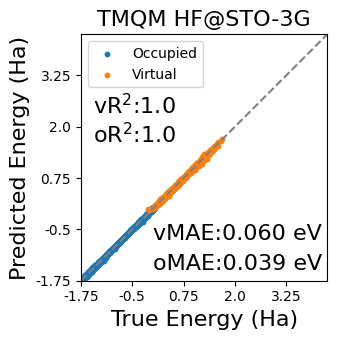

In [33]:
obj = DataPlot("tm")
obj.plot()
# plt.savefig("figures/tm_plot.png",dpi=500)

## Error Distributions

0.999998545911307


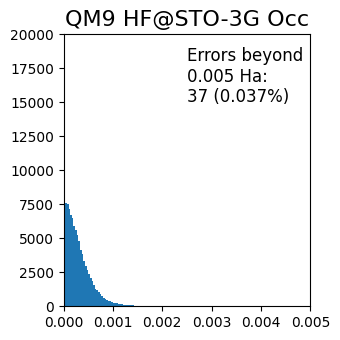

In [13]:
title_trans = {
    "sto3g":"QM9 HF@STO-3G",
    "qh9":"QM9 B3LYP@Def2SVP",
    "tm":"TMQM HF@STO-3G",
}

def hist_plot(s,occ=True,xlim=0.005):
    obj = DataPlot(s)
    if occ:
        kind = "Occ"
        arr = np.abs(obj.occ_pred - obj.occ_true)
        print(scipy.stats.pearsonr(obj.occ_true,obj.occ_pred)[0])
    else:
        kind = "Virt"
        arr = np.abs(obj.virt_pred - obj.virt_true)
        print(scipy.stats.pearsonr(obj.virt_true,obj.virt_pred)[0])
    plt.hist(arr,bins=1000);
    plt.xlim(0,xlim)
    num = (arr > xlim).sum()
    pct = np.round(num/len(arr)*100,3)
    t = title_trans[s]
    plt.title(f"{t} {kind}",fontsize=16)
    plt.ylim(0,20000)
    plt.text(xlim/2,15000,f"Errors beyond\n{xlim} Ha:\n{num} ({pct}%)",fontsize=12)
    plt.tight_layout()

hist_plot("sto3g",occ=True)
plt.savefig("figures/sto3g_occ_hist.png",dpi=500)

0.9999811977262174


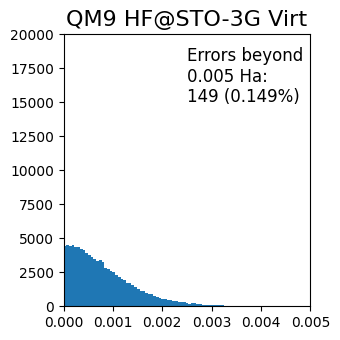

In [14]:
hist_plot("sto3g",occ=False)
plt.savefig("figures/sto3g_virt_hist.png",dpi=500)

0.9994824272374466


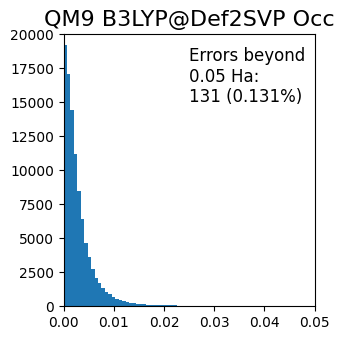

In [15]:
hist_plot("qh9",occ=True,xlim=0.05)
plt.savefig("figures/qh9_occ_hist.png",dpi=500)

0.9984045547487749


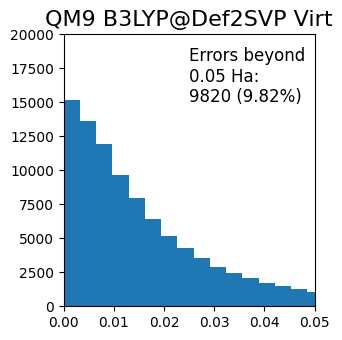

In [16]:
hist_plot("qh9",occ=False,xlim=0.05)
plt.savefig("figures/qh9_virt_hist.png",dpi=500)

0.9999608629660157


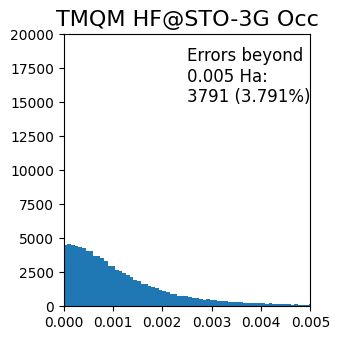

In [17]:
hist_plot("tm",occ=True)
plt.savefig("figures/tm_occ_hist.png",dpi=500)

0.999894737590138


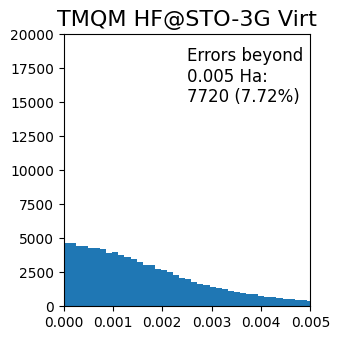

In [18]:
hist_plot("tm",occ=False)
plt.savefig("figures/tm_virt_hist.png",dpi=500)